# Natural Language Processing -  Job Advertisement Classification


## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from itertools import chain
from sklearn.datasets import load_files  
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import *
import json
import gensim.models
from gensim import utils
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

### Task 2.1 Generating Count Vector

In [2]:
# Open job adv data file for reading
df = pd.read_csv('job_adv.txt', sep=" ")

# Open tokenize list file for reading
with open('job_adv_json.txt', 'r') as filehandle:
    tk_adv_ls = json.load(filehandle)


job_adv_str_f = open('job_adv_string.txt', 'r')
job_adv_str = job_adv_str_f.read()
#job_adv_str_ls = job_adv_str_d.replace('\n', ' ').split(".")
#job_adv_str[0]

# Open vocab file for reading
vocab_dict =  {}
with open('vocab.txt', 'r') as f:
    for line in f:
        v = line.strip().split(":")
        vocab_dict[v[0]] = int(v[1])
    
print("number of job adv txt read:", len(df['description']))
print("number of job adv webindex read:", len(df['webindex']))    
df['description']
df


number of job adv txt read: 776
number of job adv webindex read: 776


,advertisement,categoryidx,filename,title,webindex,company,description,tk_adv5
0,Title: Finance / Accounts Asst Bromley to ****...,0,data/Accounting_Finance\Job_00382.txt,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South...,"['accountant', 'partqualified', 'south', 'east..."
1,Title: Fund Accountant Hedge Fund\nWebindex: ...,0,data/Accounting_Finance\Job_00354.txt,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is c...,"['hedge', 'funds', 'london', 'recruiting', 'fu..."
2,Title: Deputy Home Manager\nWebindex: 68700336...,2,data/Healthcare_Nursing\Job_00547.txt,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an...,"['exciting', 'arisen', 'establish', 'provider'..."
3,Title: Brokers Wanted Imediate Start\nWebindex...,0,data/Accounting_Finance\Job_00246.txt,Brokers Wanted Imediate Start,67996688,OneTwoTrade,OneTwoTrade is expanding their Sales Team and...,"['expanding', 'recruiting', 'junior', 'trainee..."
4,Title: RGN Nurses (Hospitals) Penarth\nWebind...,2,data/Healthcare_Nursing\Job_00543.txt,RGN Nurses (Hospitals) Penarth,71803987,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and...,"['rgn', 'nurses', 'hospitals', 'fulltime', 'pa..."
...,...,...,...,...,...,...,...,...
771,"Title: Apply Today, Start Tomorrow New Sales f...",3,data/Sales\Job_00764.txt,"Apply Today, Start Tomorrow New Sales for 2013",70457475,Motion Marketing Ltd,"Apply Today, Start Tomorrow New Sales for 201...","['today', 'start', 'tomorrow', 'money', 'caree..."
772,Title: Assembly/Production Technicians Milton ...,1,data/Engineering\Job_00002.txt,Assembly/Production Technicians Milton Keynes,71631590,Newstaff Employment Services Ltd,Main Purpose of Job:To perform a range of mec...,"['main', 'purpose', 'perform', 'range', 'mecha..."
773,Title: Medical Sales Executive/Associate Orth...,3,data/Sales\Job_00630.txt,Medical Sales Executive/Associate Orthopaedics,70028343,Progress Sales Recruitment,Sales Associate – Hip and Knee Orthopaedics A...,"['associate', 'hip', 'knee', 'orthopaedics', '..."
774,Title: Mobile Optometrist Oxford\nWebindex: 7...,2,data/Healthcare_Nursing\Job_00560.txt,Mobile Optometrist Oxford,71402732,Zest Optical,A mobile Super Optometrist is required to joi...,"['mobile', 'optometrist', 'providers', 'domici..."


In [3]:
words = list(chain.from_iterable(tk_adv_ls)) 
vocab = set(words) 
vocab_sorted = sorted(list(vocab))

In [4]:
# Generating Binary Vectors
bVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab_sorted, binary = True) 
binary_features = bVectorizer.fit_transform([' '.join(article) for article in tk_adv_ls])
vocab2 = bVectorizer.get_feature_names_out()
print('Vocab count: ' +str(len(vocab)))
print('Binary vocab count: ' +str(len(vocab2)))
print('Binary Vectors Shape:' + str(binary_features.shape))

Vocab count: 5168
Binary vocab count: 5168
Binary Vectors Shape:(776, 5168)


In [5]:
# validator function
def validator(data_features, vocab, a_ind, article_ids,article_txts,tokenised_articles):
    print("Webindex:", article_ids[a_ind]) # print out the Article ID
    print("--------------------------------------------")
    print("Descriptions:",article_txts[a_ind]) # print out the txt of the article
    print("Descriptions tokens:",tokenised_articles[a_ind]) # print out the tokens of the article
    print("--------------------------------------------\n")
    print("Vector representation:\n") # printing the vector representation as format 'word:value' (
                                      # the value is 0 or 1 in for binary vector; an integer for count vector; and a float value for tfidf

    for word, value in zip(vocab, data_features.toarray()[a_ind]): 
        if value > 0:
            print(word+":"+str(value), end =' ')

In [6]:
# Random validation on generated binary vectors
test_ind = 0
article_txts = list(df['description'])
article_id = list(df['webindex'])
validator(binary_features,vocab_sorted,test_ind, article_id,article_txts,tk_adv_ls)

Webindex: 68997528
--------------------------------------------
Descriptions:  Accountant (partqualified) to **** p.a. South East London Our client, a successful manufacturing company has an immediate requirement for an Accountant for permanent role in their modern offices in South East London. The Role: Credit Control Purchase / Sales Ledger Daily collection of debts by phone, letter and email. Handling of ledger accounts Handling disputed accounts and negotiating payment terms Allocating of cash and reconciliation of accounts Adhoc administration duties within the business The Person The ideal candidate will have previous experience in a Credit Control capacity, you will possess exceptional customer service and communication skills together with IT proficiency. You will need to be a part or fully qualified Accountant to be considered for this role
Descriptions tokens: ['accountant', 'partqualified', 'south', 'east', 'london', 'manufacturing', 'requirement', 'accountant', 'permanent',

In [7]:
# Generating Count Vectors
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab_sorted)
count_features = cVectorizer.fit_transform([' '.join(article) for article in tk_adv_ls]) 
print('Count Vectors: ' +str(count_features.shape))
print('\n')
# Random validation on generated count vectors # Reference [3]
validator(count_features,vocab_sorted,test_ind, article_id,article_txts,tk_adv_ls)

Count Vectors: (776, 5168)


Webindex: 68997528
--------------------------------------------
Descriptions:  Accountant (partqualified) to **** p.a. South East London Our client, a successful manufacturing company has an immediate requirement for an Accountant for permanent role in their modern offices in South East London. The Role: Credit Control Purchase / Sales Ledger Daily collection of debts by phone, letter and email. Handling of ledger accounts Handling disputed accounts and negotiating payment terms Allocating of cash and reconciliation of accounts Adhoc administration duties within the business The Person The ideal candidate will have previous experience in a Credit Control capacity, you will possess exceptional customer service and communication skills together with IT proficiency. You will need to be a part or fully qualified Accountant to be considered for this role
Descriptions tokens: ['accountant', 'partqualified', 'south', 'east', 'london', 'manufacturing', 'requirement

In [8]:
# Generating TF-IDF Feature Vectors
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab_sorted) 
tfidf_features = tVectorizer.fit_transform([' '.join(article) for article in tk_adv_ls]) 
print('TF-IDF Vectors: ' +str(tfidf_features.shape))
print('\n')
# Random validation on generated count vectors
test_ind = 0
validator(tfidf_features,vocab_sorted,test_ind,article_id,article_txts,tk_adv_ls)

TF-IDF Vectors: (776, 5168)


Webindex: 68997528
--------------------------------------------
Descriptions:  Accountant (partqualified) to **** p.a. South East London Our client, a successful manufacturing company has an immediate requirement for an Accountant for permanent role in their modern offices in South East London. The Role: Credit Control Purchase / Sales Ledger Daily collection of debts by phone, letter and email. Handling of ledger accounts Handling disputed accounts and negotiating payment terms Allocating of cash and reconciliation of accounts Adhoc administration duties within the business The Person The ideal candidate will have previous experience in a Credit Control capacity, you will possess exceptional customer service and communication skills together with IT proficiency. You will need to be a part or fully qualified Accountant to be considered for this role
Descriptions tokens: ['accountant', 'partqualified', 'south', 'east', 'london', 'manufacturing', 'requiremen

### Task 2.2 Document Embeddings - Unweighted Version

In [9]:
# Document Vector Representation:Document Vector Representation by Summing Word Vectors
def docvecs(embeddings, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        docvec = np.vstack([embeddings[term] for term in valid_keys])
        """
        Note: using `sum` here, other 'pooling' options are possible too,
        e.g. mean, etc.
        """
        docvec = np.sum(docvec, axis=0)
        vecs[i,:] = docvec
    return vecs

In [10]:
# explore the reprensentiveness of the features through tSNE
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(len(features) * 0.3)
    np.random.seed(0)
    indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    plt.legend()
    plt.show()

In [11]:
# document embeddings - unweighted - FastText (in-house trained on Job Adv Desc)
print('FastText Model - in-house trained on Job Adv Desc:')

# 1. Set the corpus file names/path
corpus_file = './job_adv_string.txt'

# 2. Initialise the Fast Text model
bbcFT = FastText(vector_size=300) 

# 3. build the vocabulary
bbcFT.build_vocab(corpus_file=corpus_file)

# 4. train the fasttext model based on the corpu (the job adv desc)
bbcFT.train(
    corpus_file=corpus_file, epochs=bbcFT.epochs,
    total_examples=bbcFT.corpus_count, total_words=bbcFT.corpus_total_words,
)

bbcFT_wv = bbcFT.wv
print(bbcFT)

# Generate document embeddings based on the load FastText word embeddings
bbcFT_dvs = docvecs(bbcFT_wv, tk_adv_ls)
bbcFT_dvs

FastText Model - in-house trained on Job Adv Desc:
FastText(vocab=2741, vector_size=300, alpha=0.025)


array([[ -5.01330471,   6.84215879,  -1.57409263, ...,  -1.02249908,
        -14.88419437,   8.70732117],
       [ -4.97921944,   5.91555166,  -1.78524935, ...,  -1.15891385,
        -15.73632145,   7.43283939],
       [ -5.3714633 ,   9.02474022,  -1.06473053, ...,  -1.11764777,
        -14.624053  ,  12.43325996],
       ...,
       [-19.25795364,  27.90260506,  -5.85861778, ...,  -4.10402346,
        -56.74825287,  35.65288925],
       [ -7.10753584,  12.09409142,  -2.04083252, ...,  -1.63081765,
        -19.34594345,  16.02136803],
       [ -7.76888132,  13.81687546,  -2.26885772, ...,  -1.59749448,
        -21.80130196,  18.64387703]])

In [12]:
# document embeddings - unweighted - Word2Vec (in-house trained on Job Adv Desc)
print('Word2Vec Model - in-house trained on Job Adv Desc:')

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""
    def __init__(self, corpusFile):
        MyCorpus.fPath = corpusFile # specific the path to the corpus file
    def __iter__(self):
        for line in open(self.fPath):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

sentences = MyCorpus('./job_adv_string.txt')
bbc_w2v = gensim.models.Word2Vec(sentences=sentences,vector_size=300)
bbcW2v_wv = bbc_w2v.wv
print(bbc_w2v)
bbcW2v_dvs = docvecs(bbcW2v_wv, tk_adv_ls)
bbcW2v_dvs

Word2Vec Model - in-house trained on Job Adv Desc:
Word2Vec(vocab=2734, vector_size=300, alpha=0.025)


array([[ 2.13206482, 11.35591507,  0.47994161, ..., -1.60102785,
        11.87269688, -2.08818555],
       [ 1.68231463,  8.83240986,  0.34356767, ..., -1.2139107 ,
         9.24249268, -1.64625442],
       [ 1.23711324, 14.69829559,  0.50693107, ..., -0.61092687,
        14.08016872, -1.15206563],
       ...,
       [ 6.38571453, 44.16041946,  1.74942935, ..., -4.49617338,
        44.8105011 , -6.13983917],
       [ 2.74743366, 18.06885719,  0.66571987, ..., -1.52630961,
        17.94672012, -2.4704144 ],
       [ 1.98591018, 20.41904068,  0.53371835, ..., -0.6511941 ,
        19.88286591, -1.48606801]])

In [13]:
# document embeddings - unweighted - pre-trained GloVe
# GloVe: pre-trained on the Wikipedia 2014 + Gigaword 5 corpus
print('GloVe Model - Pre-trained:')

with open("glove/glove.6B.300d.txt" , encoding='utf-8') as f:
    keys, weights = [], []
    for l in f:
        k, v = l.split(maxsplit=1)
        keys.append(k)
        weights.append(np.fromstring(v, sep=' '))
glove_embeddings = KeyedVectors(300, count=400000)
glove_embeddings.add_vectors(keys, weights)
preTGloVe_wv = glove_embeddings

# Generate document embeddings based on the load FastText word embeddings
preTGloVe_dvs = docvecs(preTGloVe_wv, tk_adv_ls)
preTGloVe_dvs

GloVe Model - Pre-trained:


array([[ -7.19810486,   2.63172007,   0.8609845 , ...,  -5.65609264,
         -6.19553089,  -3.63183761],
       [ -6.89044046,  -2.8091929 ,   9.30348873, ...,  -1.23375547,
         -1.64673841,  -3.43777943],
       [ -8.04069138,   2.56676459,  -2.73822021, ...,  -8.24769974,
         -0.05749264,  -1.68907344],
       ...,
       [-23.27559662,  21.80566788,  20.57919502, ..., -21.02225113,
        -19.07705688, -12.43885803],
       [-15.75280285,  -1.04831266,   0.39948487, ...,  -4.9242363 ,
          0.13894579,  -8.50161648],
       [ -7.89226723,   9.91180325,  -1.01520276, ..., -11.14487362,
         -8.21194935,   1.30853271]])

In [14]:
# document embeddings - unweighted - word2vec
# word2vec: pre-trained word2vec model based on google news.
print('word2vec Model - Pre-trained:')

preTW2v_wv = api.load('word2vec-google-news-300')
preTW2v_dvs = docvecs(preTW2v_wv, tk_adv_ls)
preTW2v_dvs

word2vec Model - Pre-trained:


array([[  0.90113831,   1.40629578,  -0.8860321 , ...,  -1.68453979,
         -0.59020996,  -2.94708252],
       [  0.4241333 ,   1.9196167 ,   2.23526001, ...,   0.37020874,
          0.21325684,   0.33630371],
       [ -3.33084106,  -2.04779625,   0.03677368, ...,  -3.97381592,
         -0.79232788,  -2.48217773],
       ...,
       [-12.52287769,  10.82991028,  -6.48403931, ...,   1.29606628,
         11.51195145,   2.30864334],
       [ -1.72592163,   1.71366119,  -3.29754639, ...,   0.59353876,
          2.80721283,  -2.22021484],
       [ -2.44168091,   2.34810448,  -0.95968628, ...,  -1.24267578,
          1.38404846,  -1.28265381]])

In [15]:
# document embeddings - unweighted - Genism doc2vec
print('Doc2vec Model - Pre-trained:')
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tk_adv_ls)] 
bbcD2V = Doc2Vec(documents, vector_size=300) # fit the Doc2Vec mode, with vector size of 300
print(bbcD2V)
bbcD2V.dv[0]

Doc2vec Model - Pre-trained:
Doc2Vec(dm/m,d300,n5,w5,mc5,s0.001,t3)


array([ 0.00151007,  0.020636  ,  0.02879339,  0.00706935,  0.03220261,
       -0.03956557, -0.01872314,  0.06768966,  0.00279705,  0.01067968,
       -0.02274651, -0.04988401, -0.01622092,  0.02102213, -0.02994263,
       -0.03341281,  0.03789207, -0.0062345 , -0.00795069, -0.00821428,
       -0.01583163,  0.01555027,  0.04110373,  0.0234524 ,  0.06493203,
        0.00756447, -0.01852276, -0.02174376, -0.03255564, -0.06430481,
        0.0159922 , -0.00686508, -0.02221352,  0.01931413, -0.02597466,
        0.0267818 ,  0.01729042, -0.07346184,  0.00542138, -0.00183954,
       -0.03523901, -0.00829052,  0.02286403, -0.03697536,  0.02276918,
        0.00594063, -0.00235644, -0.00424351, -0.04082771,  0.04740318,
        0.02437232,  0.02714662, -0.01524416, -0.0147425 , -0.0654318 ,
        0.05480714, -0.00159312, -0.0104386 ,  0.01708454,  0.00503976,
       -0.01744932, -0.01116282, -0.04535139,  0.01997931,  0.01434529,
       -0.01374976,  0.00710817, -0.01840961, -0.01596259, -0.02

### Task 2.3 Document Embeddings - TF-IDF Weighted Version

In [16]:
# Document Embeddings - TF-IDF weighted - FastText

# prepare vocab dictionary
def gen_vocIndex(voc_fname):
    with open(voc_fname) as vocf: 
        voc_Ind = [l.split(':') for l in vocf.read().splitlines()] # each line is 'index,word'
    return {int(vi[1]):vi[0] for vi in voc_Ind}

# Generates the w_index:word dictionary
voc_fname = './vocab.txt' # path for the vocabulary
voc_dict = gen_vocIndex(voc_fname)

In [17]:
# prepare document vector representation by TF-IDF Weighted Word Vectors
def tfidf_weight_list(data_features, vocab):    
    output_str = ''
    tfidf_weights = []
    wordweight_dict = {}
    for i, v in enumerate(data_features):   
        
        for word, value in zip(vocab, data_features.toarray()[i]): 
            if value > 0:
                wordweight_dict.update({word: value})
        tfidf_weights.append(wordweight_dict) 
        wordweight_dict = {}
        output_str = ''
    return tfidf_weights

tfidf_weight_ls = tfidf_weight_list(tfidf_features,vocab_sorted)
print(tfidf_weight_ls)

[{'accountant': 0.35106185634121084, 'accounts': 0.27498642357138875, 'adhoc': 0.13538677193538917, 'administration': 0.10381438219239907, 'capacity': 0.13391268330711703, 'cash': 0.11952118894034722, 'collection': 0.1538326433873238, 'communication': 0.07045034890364907, 'considered': 0.09554685177497566, 'control': 0.17589759839471428, 'credit': 0.25274549376401695, 'daily': 0.10590537162929867, 'debts': 0.18843292868380723, 'duties': 0.08314792747623503, 'east': 0.20564660743480745, 'email': 0.07903543423856024, 'exceptional': 0.12867304844318694, 'fully': 0.10645278680180173, 'handling': 0.24452050728866742, 'ideal': 0.08824056238987174, 'ledger': 0.27388115772122074, 'letter': 0.12867304844318694, 'london': 0.1688061602552218, 'manufacturing': 0.09750260130289759, 'modern': 0.1325105307054478, 'negotiating': 0.16024543818617706, 'offices': 0.11546681185518241, 'part': 0.07207442096808514, 'partqualified': 0.17375260346753055, 'payment': 0.1385832217997621, 'permanent': 0.081945307

In [18]:
# Function to generate weight vector
def weighted_docvecs(embeddings, tfidf, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        tf_weights = [float(tfidf[i].get(term, 0.)) for term in valid_keys]
        assert len(valid_keys) == len(tf_weights)
        weighted = [embeddings[term] * w for term, w in zip(valid_keys, tf_weights)]
        docvec = np.vstack(weighted)
        """
        Note: using `sum` here, other 'pooling' options are possible too,
        e.g. mean, etc.
        """
        docvec = np.sum(docvec, axis=0)
        vecs[i,:] = docvec
    return vecs


In [19]:
#  Generate the weight document embeddings - FastText, GloVe
weighted_bbcFT_dvs = weighted_docvecs(bbcFT_wv, tfidf_weight_ls, tk_adv_ls)
weighted_preTW2v_dvs = weighted_docvecs(preTW2v_wv, tfidf_weight_ls, tk_adv_ls)
weighted_bbcW2v_dvs = weighted_docvecs(bbcW2v_wv, tfidf_weight_ls, tk_adv_ls)
weighted_preTGloVe_dvs = weighted_docvecs(preTGloVe_wv, tfidf_weight_ls, tk_adv_ls)

In [20]:
#  weight document embeddings - FastText (in-house trained)
weighted_bbcFT_dvs

array([[-0.85700953,  1.0823586 , -0.28039512, ..., -0.18630517,
        -2.60416603,  1.36435151],
       [-0.83980173,  1.10646391, -0.28485119, ..., -0.18646346,
        -2.58940697,  1.43331814],
       [-0.90859383,  1.43488204, -0.0998829 , ..., -0.17700453,
        -2.27593923,  1.93720806],
       ...,
       [-1.90393329,  2.53229737, -0.52425832, ..., -0.39615047,
        -5.65662003,  3.11865306],
       [-0.83311254,  1.3116076 , -0.24723442, ..., -0.19634749,
        -2.35137868,  1.71910429],
       [-0.97989029,  1.55294776, -0.31085387, ..., -0.21487464,
        -2.82427931,  2.04382682]])

In [21]:
#  weight document embeddings - Word2Vec (in-house trained)
weighted_bbcW2v_dvs

array([[ 0.35819888,  1.80036211,  0.07261676, ..., -0.26658702,
         1.90112209, -0.35356808],
       [ 0.22132976,  1.19811821,  0.04950436, ..., -0.13081755,
         1.23813367, -0.20230787],
       [ 0.32324424,  2.41239476,  0.15751418, ..., -0.3365505 ,
         2.45000196, -0.41197705],
       ...,
       [ 0.70369643,  4.28061724,  0.19354603, ..., -0.584526  ,
         4.41058588, -0.72165298],
       [ 0.32921597,  2.10147572,  0.07542978, ..., -0.19948529,
         2.10507417, -0.30263308],
       [ 0.30264339,  2.17322135,  0.08199157, ..., -0.20594105,
         2.2235229 , -0.28416726]])

In [22]:
#  weight document embeddings - Word2Vec (pre-trained)
weighted_preTW2v_dvs

array([[ 0.41779086,  0.31274462, -0.20005389, ..., -0.36966449,
        -0.2064603 , -0.41411352],
       [ 0.85021365,  0.50651932,  1.18967128, ...,  0.10183346,
        -0.49369857, -0.3385433 ],
       [-0.19219202, -0.53402245, -0.01236384, ..., -0.98658305,
        -0.54817057, -0.57178664],
       ...,
       [-2.09950519,  1.52080035, -0.9412123 , ...,  0.13010156,
         1.73410535,  1.23761952],
       [ 0.15086804,  0.14980493, -0.66625333, ...,  0.41153935,
         0.60534531, -0.25310215],
       [-0.29865703,  0.08051737, -0.20565721, ...,  0.13979821,
         0.14254642, -0.04658957]])

In [23]:
#  weight document embeddings - GloVe (pre-trained)
weighted_preTGloVe_dvs

array([[-1.30340421,  0.23117709,  0.42910296, ..., -0.58375806,
        -1.0691638 , -0.37742084],
       [-3.71044254, -1.90813637,  2.10603142, ...,  0.17773579,
         0.10627549,  0.18961036],
       [-1.46720433,  0.78567648, -0.25155237, ..., -1.59411001,
         0.79201221, -0.21772189],
       ...,
       [-3.60553956,  1.458022  ,  3.11843729, ..., -1.47081447,
        -0.81507283,  0.99097782],
       [-2.17241192, -0.62153381,  0.48580065, ...,  0.21496226,
         0.54489458, -0.81740576],
       [-0.74569309,  0.4822408 , -0.39716932, ..., -2.46597743,
        -1.36911094,  0.81850725]])

### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [24]:
# prepare count vectors output file
def prepare_count_vectors_file(data_features,vocab,web_ids,tokenised_txt,vocab_dict):
    for i, v in enumerate(tokenised_txt):    
        if i == 0:
            output_str = "#"+str(web_ids[i])
        else:
            output_str += "\n#"+str(web_ids[i])
        for word, value in zip(vocab, data_features.toarray()[i]): 
            if value > 0:
                output_str += ','+str(vocab_dict[word])+":"+str(value)
    return output_str

# export count vector to file count_vectors.txt
string_to_file = prepare_count_vectors_file(count_features,vocab_sorted,article_id,tk_adv_ls,vocab_dict)   
out_file = open('count_vectors.txt', 'w') 
out_file.write(string_to_file)
out_file.close()


## Task 3. Job Advertisement Classification

### Task 3.1 Language model comparisons
#### Task 3.1.1 Unweighted Version - FastText, GloVe, Word2Vec, Doc2Vec models

In-house trained FastText Model (unweighted):


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


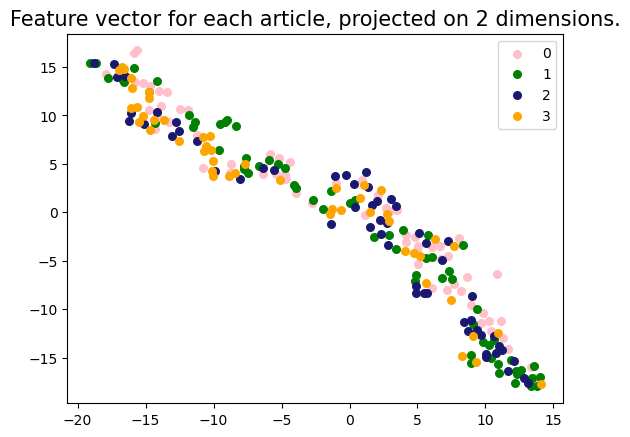

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.5642023346303502
5-Fold Cross Validation:
MAE:  0.7193061840120663
RMSE:  1.1849992522160675


In [25]:
# document embeddings - unweighted - FastText (in-house trained) 
%matplotlib inline
seed = 0
k_folds = KFold(n_splits = 5, random_state=1, shuffle=True) # 5-fold cross validation

print('In-house trained FastText Model (unweighted):')
# plot out the feature vectors projected in a 2-dimensional space,then 
# category: 0 - Accounting_Finance, 1 - Engineering, 2 - Healthcare_Nursing, 3 - Sales  
features = bbcFT_dvs
plotTSNE(df['categoryidx'],features)

# build the classfication model and report results: FastText
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(bbcFT_dvs, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 100,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

In-house trained Word2vec Model (unweighted):


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


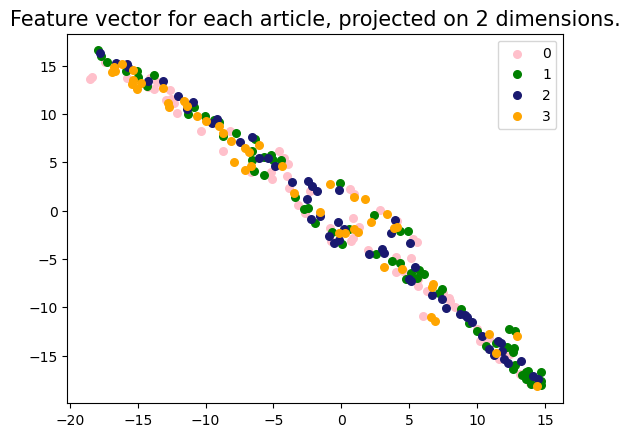

Accuracy:  0.5252918287937743
5-Fold Cross Validation:
MAE:  0.7039969834087481
RMSE:  1.2331824945468175


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# document embeddings - unweighted - Word2vec (in-house trained) 
print('In-house trained Word2vec Model (unweighted):')

features = bbcW2v_dvs
plotTSNE(df['categoryidx'],features)
# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(bbcW2v_dvs, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 100,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Pretrained GloVe Model (unweighted):


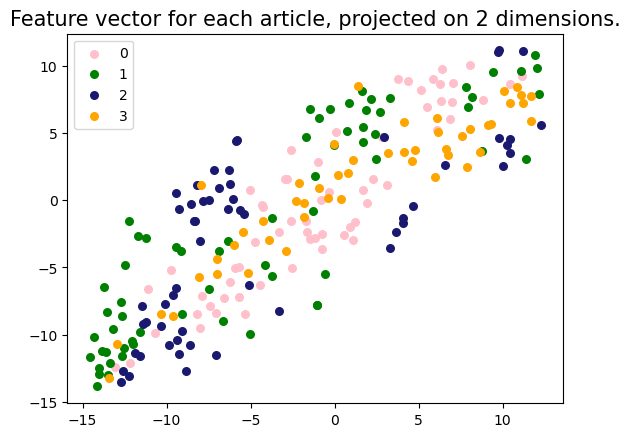

Accuracy:  0.7976653696498055
5-Fold Cross Validation:
MAE:  0.2913273001508295
RMSE:  0.7807545563265936


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# document embeddings - unweighted - GloVe 
print('Pretrained GloVe Model (unweighted):')
features = preTGloVe_dvs
plotTSNE(df['categoryidx'],features)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(preTGloVe_dvs, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 100,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

Word2Vec Model (unweighted):


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


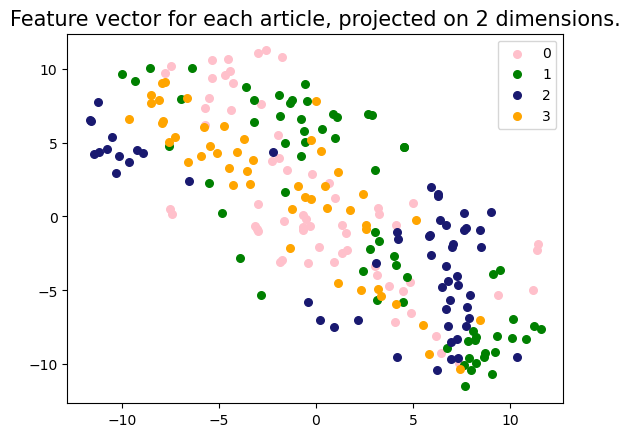

Accuracy:  0.8287937743190662
5-Fold Cross Validation:
MAE:  0.20211161387631976
RMSE:  0.6172483091213148


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print('Word2Vec Model (unweighted):')
# document embeddings - unweighted - Word2Vec 
features = preTW2v_dvs
plotTSNE(df['categoryidx'],features) # plot the tSNE to have a look

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(preTW2v_dvs, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 100,random_state=seed) 
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

Pretrained Genism Doc2Vec Model (unweighted):


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


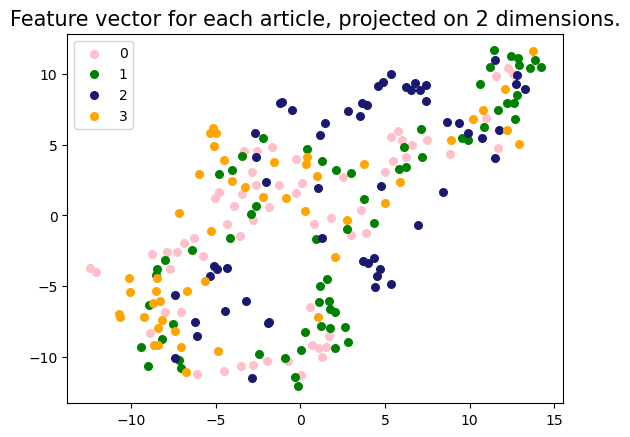

Accuracy:  0.6070038910505836
5-Fold Cross Validation:
MAE:  0.6883861236802413
RMSE:  1.1310108400727161


In [29]:
print('Pretrained Genism Doc2Vec Model (unweighted):')
# document embeddings - unweighted - Doc2Vec 
plotTSNE(df['categoryidx'],bbcD2V.dv)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(bbcD2V.dv, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

#### Task 3.1.2 Weighted Version - FastText, GloVe, Word2Vec models

Weighted In-house FastText: tSNE 2 dimensional projected Feature space


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


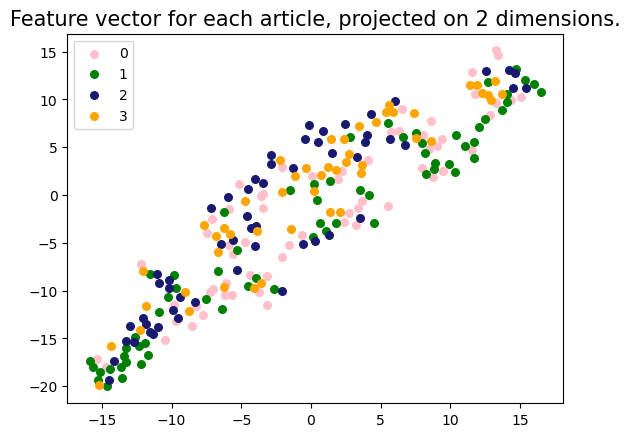

Accuracy:  0.6498054474708171
5-Fold Cross Validation:
MAE:  0.6218702865761689
RMSE:  1.0541164013675035



Weighted In-house Word2Vec: tSNE 2 dimensional projected Feature space


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


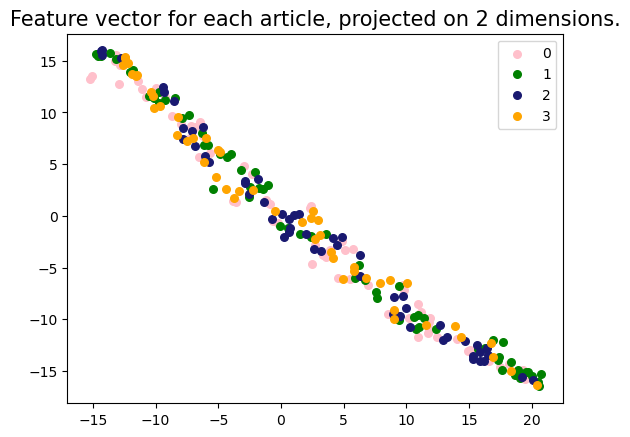

Accuracy:  0.6536964980544747
5-Fold Cross Validation:
MAE:  0.6766214177978884
RMSE:  1.1832159566199232



Weighted Pretrained Word2Vec: tSNE 2 dimensional projected Feature space


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


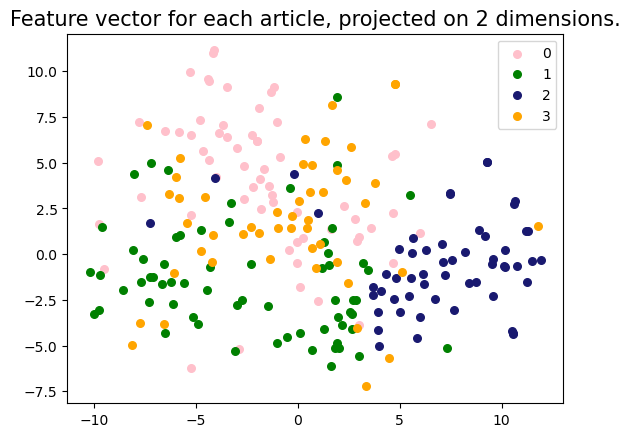

Accuracy:  0.8482490272373541
5-Fold Cross Validation:
MAE:  0.3034690799396682
RMSE:  0.7433972809644919



Weighted Pretrained GloVe: tSNE 2 dimensional projected Feature space


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


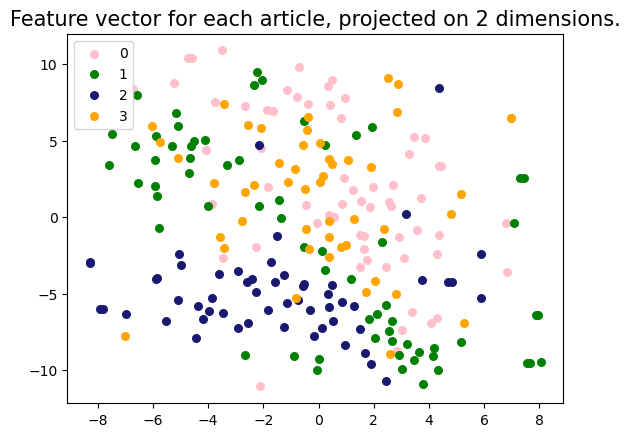

Accuracy:  0.7587548638132295
5-Fold Cross Validation:
MAE:  0.389291101055807
RMSE:  0.8646745872175201





In [30]:
# plot out the feature vectors projected in a 2-dimensional space,then 
# category: 0 - Accounting_Finance, 1 - Engineering, 2 - Healthcare_Nursing, 3 - Sales  
# build the logistic regression model for document classfication and report the model performance.

%matplotlib inline
seed = 0

models = [weighted_bbcFT_dvs, weighted_bbcW2v_dvs, weighted_preTW2v_dvs, weighted_preTGloVe_dvs]
model_names = ["Weighted In-house FastText", "Weighted In-house Word2Vec", "Weighted Pretrained Word2Vec", "Weighted Pretrained GloVe"]

for i in range(0,len(models)): #loop through each model
    dv = models[i]
    name = model_names[i]
    features = dv
    print(name + ": tSNE 2 dimensional projected Feature space")
    plotTSNE(df['categoryidx'],features)
    
    # creating training and test split
    X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(dv, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

    model = LogisticRegression(max_iter = 2000,random_state=seed)
    model.fit(X_train, y_train)
    
    print("Accuracy: ", model.score(X_test, y_test))
    
    print("5-Fold Cross Validation:")
    scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=k_folds, n_jobs=-1)
    print("MAE: ", np.mean(np.absolute(scores)))
    scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
    print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))
    print('\n\n')


### Task 3.2 Does more information provide higher accuracy?

#### Task 3.2.1 Un-weighted Version - Doc2Vec - title, title + desc

In [31]:
# tokenize txt function 
def tokenizeTxt(input_txt):
    # sent_tokenize and converted into the lower case
    sentences = sent_tokenize(input_txt.lower())
    
    # tokenize each sentence
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = RegexpTokenizer(pattern) 
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]
    
    # merge them into a list of tokens
    tokenised_txt = list(chain.from_iterable(token_lists))
    return tokenised_txt

# tokenize title
df[df['title'] == None]

tk_tit_ls = []
for i, txt in df.title.iteritems():
        if txt != None:
            tk_txt = tokenizeTxt(txt)
            tk_tit_ls.append(tk_txt)            

Pretrained Doc2Vec Model (unweighted) on Title:
Doc2Vec(dm/m,d300,n5,w5,mc5,s0.001,t3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


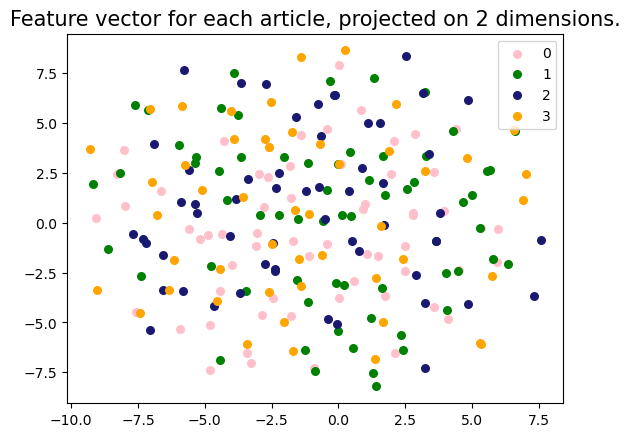

Accuracy:  0.3035019455252918
5-Fold Cross Validation:
MAE:  0.8987933634992459
RMSE:  1.1416957037405668


In [32]:
# Title - Unweighted document embeddings using Pretrained Doc2Vec model 
print('Pretrained Doc2Vec Model (unweighted) on Title:')
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tk_tit_ls)] 
D2V_title = Doc2Vec(documents, vector_size=300) # fit the Doc2Vec mode, with vector size of 300
print(D2V_title)

# plotTSNE
plotTSNE(df['categoryidx'],D2V_title.dv)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(D2V_title.dv, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

Pretrained Doc2Vec Model (unweighted) on Title and Description:
Doc2Vec(dm/m,d300,n5,w5,mc5,s0.001,t3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


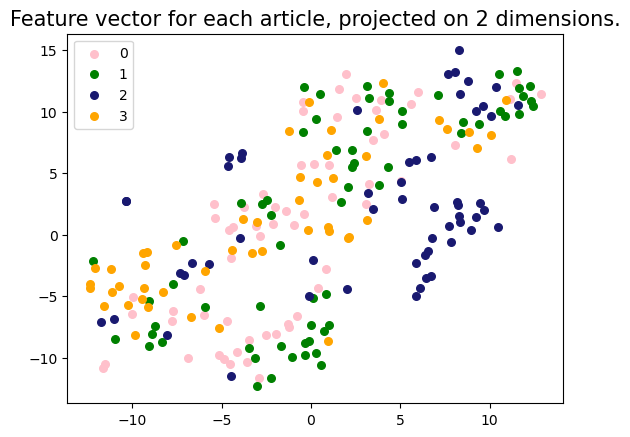

Accuracy:  0.6770428015564203
5-Fold Cross Validation:
MAE:  0.5403469079939669
RMSE:  1.0525054500921147


In [33]:
# Title + Description - Unweighted document embeddings using Pretrained Doc2Vec model 

# concatenate job advertisement's title and description
tk_tit_des_ls = []
for i, txt in enumerate(tk_tit_ls):
    tk_tit_des_ls.append(tk_tit_ls[i]+tk_adv_ls[i])


print('Pretrained Doc2Vec Model (unweighted) on Title and Description:')
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tk_tit_des_ls)] 
D2V_title_desc = Doc2Vec(documents, vector_size=300) # fit the Doc2Vec mode, with vector size of 300
print(D2V_title_desc)

# plotTSNE
plotTSNE(df['categoryidx'],D2V_title_desc.dv)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(D2V_title_desc.dv, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

#### Task 3.2.2 Un-weighted Version - Word2Vec - title, title + desc

In [34]:
# Document Vector Representation:Document Vector Representation by Summing Word Vectors 
def docvecs2(embeddings, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        try:
            docvec = np.vstack([embeddings[term] for term in valid_keys])
        except:
            pass
        docvec = np.sum(docvec, axis=0)
        vecs[i,:] = docvec
    return vecs

# Function to generate weight vector # Reference [4]
def weighted_docvecs2(embeddings, tfidf, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        try:
            tf_weights = [float(tfidf[i].get(term, 0.)) for term in valid_keys]
            assert len(valid_keys) == len(tf_weights)
            weighted = [embeddings[term] * w for term, w in zip(valid_keys, tf_weights)]
            docvec = np.vstack(weighted)
        except:
            pass
        docvec = np.sum(docvec, axis=0)
        vecs[i,:] = docvec
    return vecs

# prepare vocab list
tit_words = list(chain.from_iterable(tk_tit_ls)) 
tit_vocab = set(tit_words) 
tit_vocab_sorted = sorted(list(tit_vocab))

tit_des_words = list(chain.from_iterable(tk_tit_des_ls)) 
tit_des_vocab = set(tit_des_words) 
tit_des_vocab_sorted = sorted(list(tit_des_vocab))

tit_cVectorizer = CountVectorizer(analyzer = "word",vocabulary = tit_vocab_sorted) # initialised the CountVectorizer
tit_count_features = cVectorizer.fit_transform([' '.join(article) for article in tk_tit_ls])

tit_preTW2v_dvs = docvecs2(preTW2v_wv, tk_tit_ls)
tit_des_preTW2v_dvs = docvecs2(preTW2v_wv, tk_tit_des_ls)

Pretrained Word2Vec Model (unweighted) on Title:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


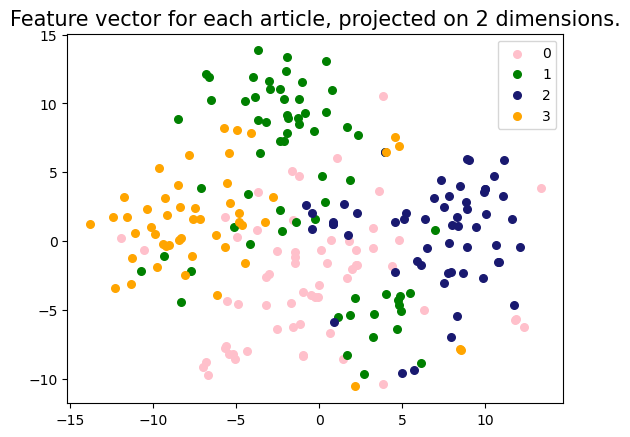

Accuracy:  0.8326848249027238
5-Fold Cross Validation:
MAE:  0.2684766214177979
RMSE:  0.7246989284890953


In [35]:
# Title - Unweighted document embeddings using Pretrained Word2Vec model 
print('Pretrained Word2Vec Model (unweighted) on Title:')

# plotTSNE
plotTSNE(df['categoryidx'],tit_preTW2v_dvs)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(tit_preTW2v_dvs, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

Pretrained Word2Vec Model (unweighted) on Title + Desc:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


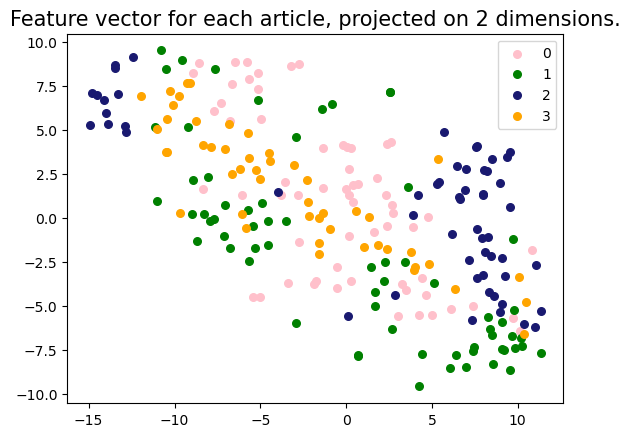

Accuracy:  0.8599221789883269
5-Fold Cross Validation:
MAE:  0.18650075414781297
RMSE:  0.5779377703222099


In [36]:
# Title - Unweighted document embeddings using Pretrained Doc2Vec model 
print('Pretrained Word2Vec Model (unweighted) on Title + Desc:')

# plotTSNE
plotTSNE(df['categoryidx'],tit_des_preTW2v_dvs)

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(tit_des_preTW2v_dvs, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

model = LogisticRegression(max_iter = 1000,random_state=seed)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

print("5-Fold Cross Validation:")
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error',
                         cv=k_folds, n_jobs=-1)
print("MAE: ", np.mean(np.absolute(scores)))
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error',
                         cv=k_folds, n_jobs=-1)
print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))

#### Task 3.2.3 Weighted Version - Word2Vec - title, desc, title + desc

In [37]:
# vectorizer vocab list
tit_tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = tit_vocab_sorted) 
tit_tfidf_features = tit_tVectorizer.fit_transform([' '.join(article) for article in tk_tit_ls]) 
tit_des_tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = tit_des_vocab) 
tit_des_tfidf_features = tit_des_tVectorizer.fit_transform([' '.join(article) for article in tk_tit_des_ls]) 
print('Title TF-IDF Vectors: ' +str(tit_tfidf_features.shape))
print('Desc TF-IDF Vectors: ' +str(tfidf_features.shape))
print('Title Desc TF-IDF Vectors: ' +str(tit_des_tfidf_features.shape))

#  Generate the weight document embeddings - Word2Vec # Reference [4]
tit_tfidf_weight_ls = tfidf_weight_list(tit_tfidf_features,tit_vocab_sorted)
tit_des_tfidf_weight_ls = tfidf_weight_list(tit_des_tfidf_features,tit_vocab_sorted)
tit_weighted_preTW2v_dvs = weighted_docvecs2(preTW2v_wv, tit_tfidf_weight_ls, tk_tit_ls)
tit_desc_weighted_preTW2v_dvs = weighted_docvecs2(preTW2v_wv, tit_des_tfidf_weight_ls, tk_tit_des_ls)

Title TF-IDF Vectors: (776, 1003)
Desc TF-IDF Vectors: (776, 5168)
Title Desc TF-IDF Vectors: (776, 5384)


Title - Weighted Pretrained Word2Vec: tSNE 2 dimensional projected Feature space


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


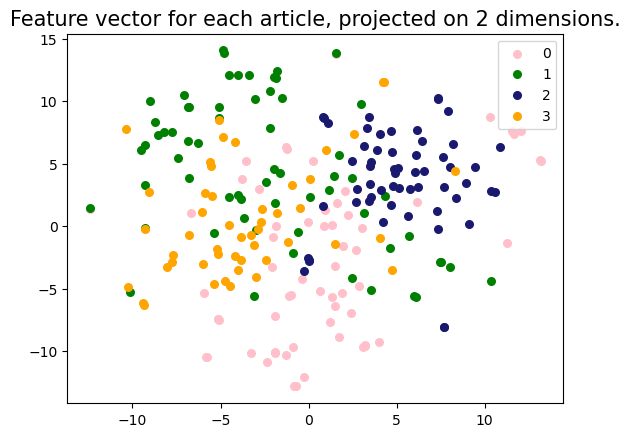

Accuracy:  0.8482490272373541
5-Fold Cross Validation:
MAE:  0.30346907993966815
RMSE:  0.7640094287636894



Desc - Weighted Pretrained Word2Vec: tSNE 2 dimensional projected Feature space


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


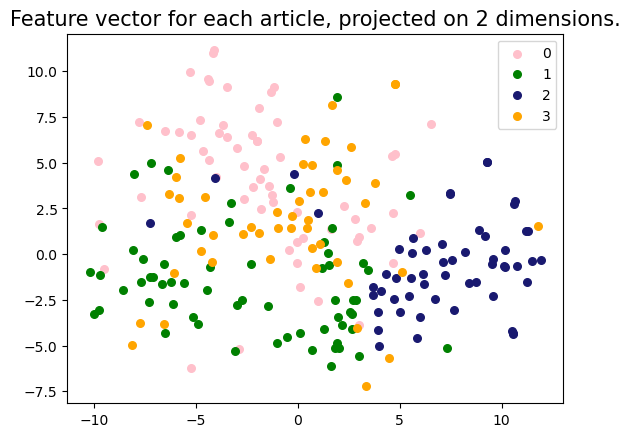

Accuracy:  0.8482490272373541
5-Fold Cross Validation:
MAE:  0.3034690799396682
RMSE:  0.7433972809644919



Title + Desc - Weighted Pretrained Word2Vec: tSNE 2 dimensional projected Feature space


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


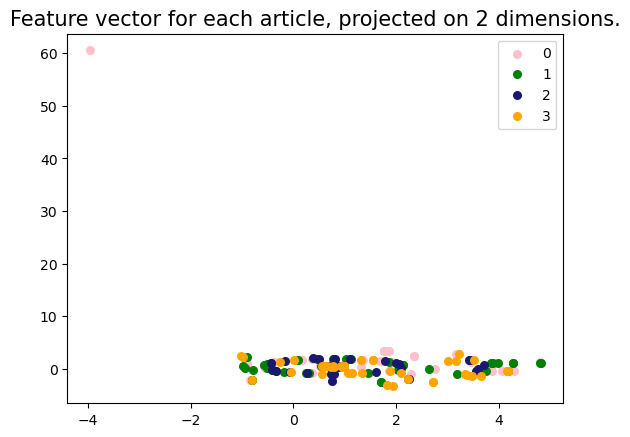

Accuracy:  0.3540856031128405
5-Fold Cross Validation:
MAE:  0.8833333333333332
RMSE:  1.1585149385075266





In [38]:
# plot out the feature vectors projected in a 2-dimensional space,then 
%matplotlib inline
seed = 0

models = [tit_weighted_preTW2v_dvs, weighted_preTW2v_dvs, tit_desc_weighted_preTW2v_dvs]
model_names = ["Title - Weighted Pretrained Word2Vec", "Desc - Weighted Pretrained Word2Vec", "Title + Desc - Weighted Pretrained Word2Vec"]

for i in range(0,len(models)): #loop through each model
    dv = models[i]
    name = model_names[i]
    features = dv
    print(name + ": tSNE 2 dimensional projected Feature space")
    plotTSNE(df['categoryidx'],features)
    
    # creating training and test split
    X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(dv, df['categoryidx'], list(range(0,len(df))),test_size=0.33, random_state=seed)

    model = LogisticRegression(max_iter = 2000,random_state=seed)
    model.fit(X_train, y_train)
    
    print("Accuracy: ", model.score(X_test, y_test))
    
    print("5-Fold Cross Validation:")
    scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=k_folds, n_jobs=-1)
    print("MAE: ", np.mean(np.absolute(scores)))
    scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=k_folds, n_jobs=-1)
    print("RMSE: ", np.sqrt(np.mean(np.absolute(scores))))
    print('\n\n')


## Summary

1) Language model comparisons<br/>

To find out which language model performs the best on the job advertisement descriptions. Modeling with in-house trained and pre-trained language models has been executed with weighted and un-weighted word vectors. Below are the models used in this language model comparison activity.   

FastText: model was Initialised with using 300 dimention vectors.<br/>
GloVe: the text-encoded with 300-dimensional vectors size (glove.6B.300d.txt) was used. <br/>
Word2Vec: embeddings pre-trained from Google news 300 dataset. [4]<br/>
Doc2Vec: vector size of 300 was used to fit the Doc2Vec mode. <br/>

Below are the summarize of the model performance:

|                             | Accuracy    | Accuracy | MAE         | MAE      | RMSE        | RMSE     |
|-----------------------------|-------------|----------|-------------|----------|-------------|----------|
|                             | Un-weighted | Weighted | Unweighted  | Weighted | Unweighted  | Weighted |
| FastText (In-house trained) | 0.560311284 | 0.645914 | 0.664555    | 0.621946 | 1.137725    | 1.068788 |
| Word2Vec (In-house trained) | 0.548638132 | 0.649805 | 0.70724     | 0.665234 | 1.215163    | 1.131311 |
| Word2Vec (Pre-trained)      | 0.828793774 | 0.848249 | 0.202112    | 0.303469 | 0.617248    | 0.743397 |
| GloVe (Pre-trained)         | 0.79766537  | 0.758755 | 0.291327    | 0.389291 | 0.780755    | 0.864675 |
| Doc2Vec (Pre-trained)       | 0.587548638 |          | 0.676923    |          | 1.149923    |          |

Findings:<br/>
Pre-trained Word2Vec has the best performance (highest Accuracy, lowest MAE, RMSE) compared to other models on the job advertisement descriptions. <br/>
Overall, the in-house trained models do not performance as well as the pre-trained models. <br/>
For the weighted vs. unweighted version of model, mixed results were obtained.  For example, FastText in-house trained model got better MAE, RMSE in the weighted version, however pre-trained GloVe and Word2Vec got better MAE, RMSE in the unweighted version instead.



2) Does more information provide higher accuracy?<br/>

Un-weighted word embeddings:<br/>
Doc2Vec and Word2Vec language models were used to evaluate if more information provided can enhance the model performance.   Execution of the logistic regression model was performed for the Title of the job advertisement, description of the job advertisement, and concatenation of the title and description of the job advertisement. Below is the evaluation result.

| Doc2Vec Model     | Accuracy    | MAE      | RMSE     |
|-------------------|-------------|----------|----------|
| Title             | 0.303501946 | 0.898793 | 1.141696 |
| Description       | 0.587548638 | 0.676923 | 1.149923 |
| Title+Description | 0.712062256 | 0.563951 | 1.060038 | 

| WordVec Model     | Accuracy | MAE      | RMSE     |
|-------------------|----------|----------|----------|
| Title             | 0.832685 | 0.268477 | 0.724699 |
| Description       | 0.828794 | 0.202112 | 0.617248 |
| Title+Description | 0.859922 | 0.186501 | 0.577938 | 

In both Doc2Vec and WordVec models with un-weighted embedding vector, using concatenation of the title and description has achieved the highest model performance (the lowest MAE/RMSE and the highest accuracy) when compared to modeling with title or description alone. The result demonstrated that when more information cooperates for word embedding, it can improve the classification model accuracy. 

Weighted word embeddings:<br/>
Word2Vec language model was used to evaluate if more information provided can enhance the model performance for weighted word embeddings. Below is the evaluation result of the model performance.

| Word2Vec Model     | Accuracy | MAE      | RMSE     |
|--------------------|----------|----------|----------|
| Title              | 0.848249 | 0.303469 | 0.764009 |
| Description        | 0.848249 | 0.303469 | 0.743397 |
| Title+Description  | 0.354086 | 0.883333 | 1.158515 |

The weighted word embedding model execution findings were not in line with the results from the un-weighted one.  In the weighted word embeddings, concatenation of the title and description resulted in lowering the model performance.  The findings showed that adding more information did not able to achieve higher accuracy for modeling with weighted word embeddings. 